In [30]:
%matplotlib inline

In [31]:
import matplotlib.pylab as plt
import numpy as np

In [33]:
def myfloat(b):
    try: 
        b = float(b)
    except ValueError:
        b = float(b.split('-')[0])*10**(-float(b.split('-')[1]))
    return b

In [34]:
def get_dvol(fname):
    t = []; 
    dvol = [];
    infl = [];
    flux = [];    
    f = open(fname, 'r'); 
    for line in f:
        a = (line.strip().split(" "))
        a = [myfloat(b) for b in a if b]
        t.append(a[0])
        dvol.append(a[1])
        flux.append(a[2])
        infl.append(a[3])
    t = np.array(t)
    dvol = np.array(dvol)
    flux = np.array(flux)
    infl = np.array(infl)
    total = np.cumsum(dvol  - flux - infl)
    return t, dvol, flux, infl, total

In [35]:
hnorm = .4
ainfl = .5

nprt = 1
case = "slope"

In [36]:
t_check, dvol_check, flux_check, infl_check, total_check  = get_dvol('dvol.out')
print sum(dvol_check-dvol), sum(flux_check-flux), sum(infl_check-infl)

0.0 0.0 0.0


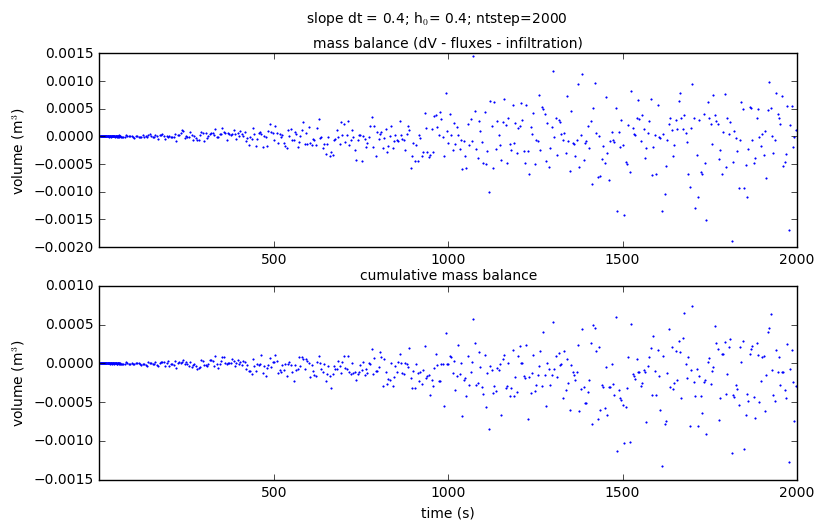

In [45]:
t, dvol, flux, infl, total  = get_dvol('dvol.out')
dt = t[-1] - t[-2]
ti = 0; tf =len(t)-1;  nprt = 10
f = plt.figure(figsize= (9,5.5))
plt.subplot(211)
plt.plot(t[ti:tf:nprt], dvol[ti:tf:nprt] - flux[ti:tf:nprt] - infl[ti:tf:nprt], '.', ms = 2)
plt.title('mass balance (dV - fluxes - infiltration)', fontsize = 10)
plt.ylabel('volume (m$^3$)'); plt.xlim([t[ti], t[tf]])
plt.subplot(212)
plt.plot(t[ti:tf:nprt],total[ti:tf:nprt], '.', ms = 2)
plt.title('cumulative mass balance', fontsize = 10)
plt.xlabel('time (s)'); plt.ylabel('volume (m$^3$)');
plt.xlim([t[ti], t[tf]])
plt.suptitle('{3} dt = {0:.1f}; h$_0$= {1:.1f}; ntstep={2:.0f}'.format(
        dt, hnorm, t[-1],  case))
f.savefig('volumeCheck/{0} dt={1:.1f} h0={2:.1f} ntstep={3:.0f}.pdf'.format(
        case, dt, hnorm, t[-1], nprt))

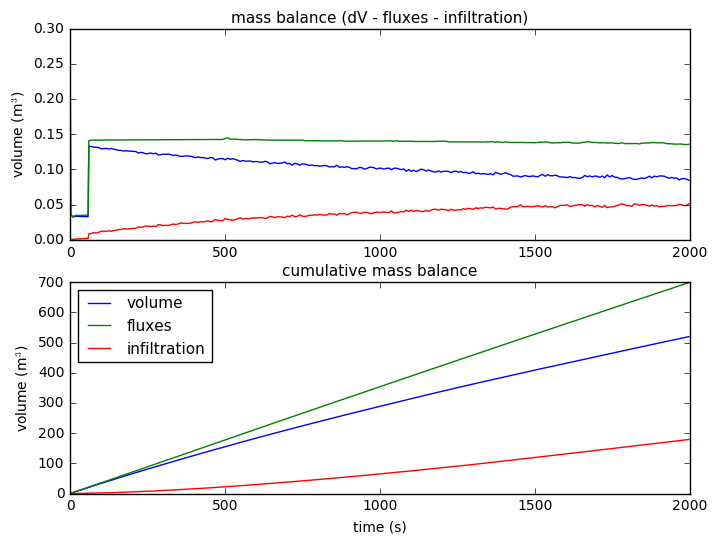

In [46]:
ti = 0; tf = len(t)+1;  nprt = 20
f = plt.figure(figsize= (8,6))
plt.subplot(211)
plt.plot(t[ti:tf:nprt], dvol[ti:tf:nprt], label = 'dV')
plt.plot(t[ti:tf:nprt], flux[ti:tf:nprt] , label = 'flux')
plt.plot(t[ti:tf:nprt], - infl[ti:tf:nprt], label = 'infl')
plt.title('mass balance (dV - fluxes - infiltration)', fontsize = 11)
plt.ylabel('volume (m$^3$)')

plt.subplot(212)
plt.plot(t[ti:tf:nprt], np.cumsum(dvol)[ti:tf:nprt], label = 'volume')
plt.plot(t[ti:tf:nprt],  np.cumsum(flux)[ti:tf:nprt], label = 'fluxes')
plt.plot(t[ti:tf:nprt], -  np.cumsum(infl)[ti:tf:nprt], label = 'infiltration')
plt.legend(loc = 'best', fontsize= 11)
plt.title('cumulative mass balance', fontsize = 11)
plt.ylabel('volume (m$^3$)'); plt.xlabel('time (s)')